In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/gdrive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
X = pd.read_csv('/gdrive/My Drive/data/train.csv', header=None)
y = pd.read_csv('/gdrive/My Drive/data/train-target.csv', header=None)
test = pd.read_csv('/gdrive/My Drive/data/test.csv', header=None)

In [2]:
X = pd.read_csv('train.csv', header=None)
y = pd.read_csv('train-target.csv', header=None)
test = pd.read_csv('test.csv', header=None)


FileNotFoundError: ignored

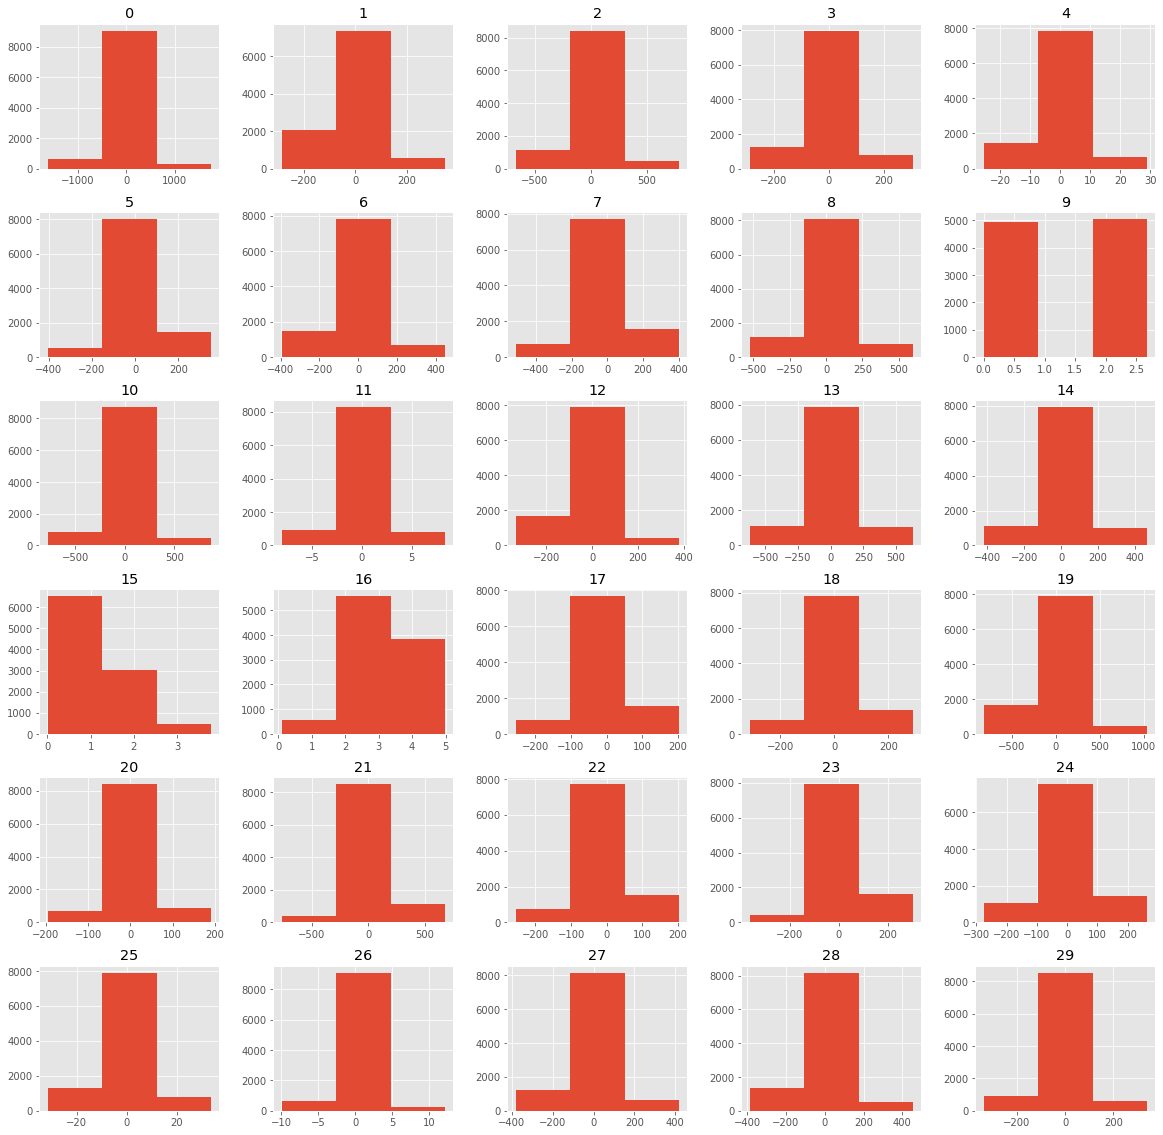

In [5]:
hist = X.hist(bins=3, figsize=(20,20))

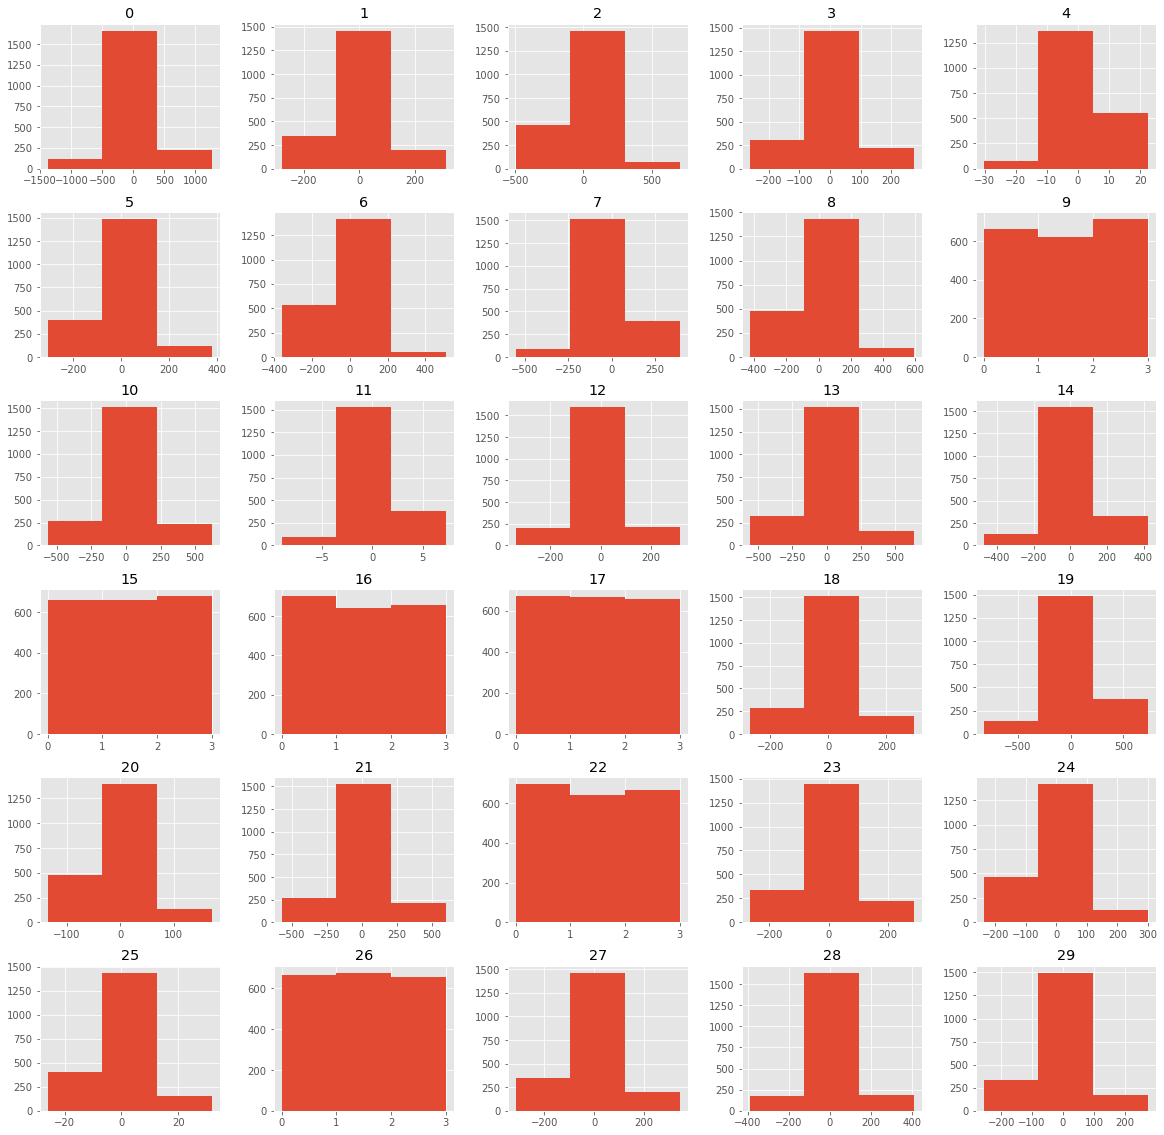

In [ ]:
hist1 = test.hist(bins=3, figsize=(20,20))

In [6]:
X = X.drop([9, 15,16, 17, 22, 26], axis=1)
test = test.drop([9, 15,16, 17, 22, 26], axis=1)

Без 9 признака на 0.01 лучше
Без [9, 15,16, 17, 22, 26] лучше на 0.1

In [7]:
data = X.values
target = y.values
target_names = np.array([0, 1])

In [ ]:
# сохранить цсв в массив

import csv

results = []
with open('train-target.csv') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row[0])
        

In [ ]:
def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    

scores=[]

for i in range(1, data.shape[1] + 1):
    model = PCA(n_components=i)
    scores.append(np.mean(cv_score(model, data)))


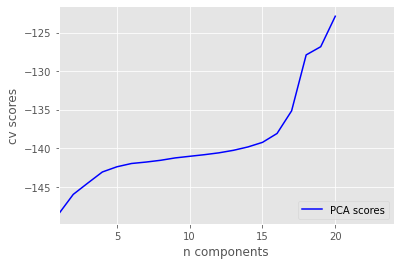

In [ ]:
plot_scores(np.asarray(scores))

In [ ]:
model = PCA(n_components=28, svd_solver='randomized')
model.fit(data)
data_transformed = pd.DataFrame(model.transform(data))

In [ ]:
test_tr = model.fit_transform(test)

### При n_neighbors = 9  ответ 74%
### При n_neighbors = 9, n_components=20 ответ - 55%
### При n_neighbors = 7 - 73%


In [ ]:
model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(data, target.ravel())



KNeighborsClassifier(n_neighbors=9)

In [ ]:
predicted = model2.predict(test)


In [ ]:
predicted.shape

(2000,)

In [ ]:
preds = pd.DataFrame(predicted)
preds.to_csv('ans.csv', header=False, index=False)

# Без PCA на КНН без [9, 15,16, 17, 22, 26] строк оценка 0.742443969775879

Случайеый лес

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=9, n_jobs=-1, random_state=17)
forest.fit(data, target.ravel())
print(round(forest.score(data, target.ravel()), 3))

0.988


In [9]:
predicted = forest.predict(test)

In [ ]:
preds = pd.DataFrame(predicted)
preds.to_csv('ans.csv', header=False, index=False)

Случайный лес без [9, 15,16, 17, 22, 26] дает ?

In [10]:
models = [Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor]
model_names = ['Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor']
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.33)

def estimate_model(model_cls):
    model = model_cls(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    return score

regression_scores = []
for model_cls in models:
    score = estimate_model(model_cls)
    regression_scores.append(score)

index = np.array(regression_scores).argmin()
answer3 = regression_scores[index]
print("best score: %s" % model_names[index])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score: RandomForestRegressor


In [11]:
rfg = RandomForestRegressor(max_depth=60, random_state=42)
rfg.fit(data, target.ravel())
print(round(rfg.score(data, target.ravel()), 3))

0.902


In [ ]:
predicted = rfg.predict(test)


In [ ]:
from sklearn.metrics import roc_auc_score

#score_rfg = roc_auc_score(test_target, solution_frame)

In [ ]:
preds = pd.DataFrame(predicted)
preds.to_csv('ans.csv', header=False, index=False)

 #### Случайный лес без [9, 15,16, 17, 22, 26] глубиной 2 дает 0.66128114512458
#### Случайный лес без [9, 15,16, 17, 22, 26] глубиной 10 дает 0.798475193900776
#### Случайный лес без [9, 15,16, 17, 22, 26] глубиной 20 дает 0.801948707794831
#### Случайный лес без [9, 15,16, 17, 22, 26] глубиной 40 дает 0.803485713942856
#### Случайный лес без [9, 15,16, 17, 22, 26] глубиной 60 дает 0.803485713942856

# Оптимизация гиперпараметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfg, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(data, target.ravel())
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.2min finished


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [ ]:
y_pred_rs = rs.best_estimator_.predict(test)

In [ ]:
preds = pd.DataFrame(y_pred_rs)
preds.to_csv('ans.csv', header=False, index=False)

#### Случайный лес без [9, 15,16, 17, 22, 26] с оптимизацией ГП дает 0.817159268637075

увеличить глубину до 40

# Оптимизация гиперпараметров 2

In [13]:
from sklearn.model_selection import GridSearchCV
n_estimators = [500,700]
max_features = ['sqrt']
max_depth = [15, 30, 40]
min_samples_split = [2,3,4,10]
min_samples_leaf = [2,3,4]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfg, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(data, target.ravel())
rfg_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 58.3min finished


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [14]:
y_pred_gs = gs.best_estimator_.predict(test)

In [15]:
preds = pd.DataFrame(y_pred_gs)
preds.to_csv('ans1.csv', header=False, index=False)

In [17]:
from google.colab import files

files.download('ans1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>